In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
# Import data from CSV's
grocery_df = pd.read_csv('../Resources/grocery_consumption_19_20.csv')
grocery_df


,Grocery Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Cereals and bakery products,142349,139160,140742,141714,141374,142700,143963,144391,142633,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942
1,Meats and poultry,162972,158595,161825,161893,161123,162745,164394,164896,163265,...,160863,160228,159684,201253,170529,167545,162020,168507,168277,169222
2,Fish and seafood,13586,13216,13567,13808,13676,13909,14027,13986,13882,...,13826,13630,13633,17109,14597,15070,15109,15103,14857,14770
3,Milk dairy products and eggs,89712,88129,89066,89515,89484,89969,90692,90802,89287,...,88958,88590,88048,109224,92285,94312,94746,96189,93489,94164
4,Fats and oils,23724,23232,23513,23978,23663,23900,24337,24396,24194,...,24352,24033,24097,30268,26117,26721,26477,26602,26164,26235
5,Fresh fruits and vegetables,83285,81046,81457,82412,83093,84110,84757,84883,84974,...,85618,85193,85144,106379,92262,93807,92650,92934,91172,91742
6,Processed fruits and vegetables,30991,29927,30011,30430,30456,30551,30996,31034,30746,...,30499,30639,30674,38355,32704,33378,32978,33136,32600,32502
7,Sugar and sweets,47493,46588,46787,47761,47776,47296,47721,47710,46768,...,47554,46298,46657,55010,46998,47971,48736,49524,48475,48231
8,Food products not elsewhere classified,151454,147410,150119,150769,151744,151673,153970,153530,152588,...,153434,153724,151106,184953,157001,161062,160482,161763,158760,160188
9,Coffee tea and other beverage materials,17512,17122,17365,17435,17466,17398,17700,17700,17595,...,17729,17821,17620,21714,18745,19244,18977,19419,18990,19086


In [3]:
grocery_df.columns

Index(['Grocery Consumption Category ', '2019M01', '2019M02', '2019M03',
       '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09',
       '2019M10', '2019M11', '2019M12', '2020M01', '2020M02', '2020M03',
       '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09'],
      dtype='object')

In [4]:
grocery_df19 = grocery_df.loc[:,['Grocery Consumption Category ','2019M01', '2019M02', '2019M03',
       '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
                                    
grocery_df19

grocery_df20 = grocery_df.loc[:,['Grocery Consumption Category ','2020M01', '2020M02', '2020M03',
       '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
grocery_df20

,Grocery Consumption Category,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Cereals and bakery products,143562,143129,177724,150935,155017,153845,155114,153090,152942
1,Meats and poultry,160228,159684,201253,170529,167545,162020,168507,168277,169222
2,Fish and seafood,13630,13633,17109,14597,15070,15109,15103,14857,14770
3,Milk dairy products and eggs,88590,88048,109224,92285,94312,94746,96189,93489,94164
4,Fats and oils,24033,24097,30268,26117,26721,26477,26602,26164,26235
5,Fresh fruits and vegetables,85193,85144,106379,92262,93807,92650,92934,91172,91742
6,Processed fruits and vegetables,30639,30674,38355,32704,33378,32978,33136,32600,32502
7,Sugar and sweets,46298,46657,55010,46998,47971,48736,49524,48475,48231
8,Food products not elsewhere classified,153724,151106,184953,157001,161062,160482,161763,158760,160188
9,Coffee tea and other beverage materials,17821,17620,21714,18745,19244,18977,19419,18990,19086


In [5]:
# grocery_df19['Total']=grocery_df19.sum(axis=1)
# grocery_df19
grocery_df19 = grocery_df19.rename(columns={'Grocery Consumption Category ': 'Consumption Category','2019M01': 'Jan', '2019M02':'Feb', '2019M03':'Mar',
       '2019M04':'Apr', '2019M05':'May', '2019M06':'Jun', '2019M07':'Jul', '2019M08':'Aug', '2019M09':'Sep'})

grocery_df20 = grocery_df20.rename(columns={'Grocery Consumption Category ': 'Consumption Category','2020M01': 'Jan', '2020M02':'Feb', '2020M03':'Mar',
       '2020M04':'Apr', '2020M05':'May', '2020M06':'Jun', '2020M07':'Jul', '2020M08':'Aug', '2020M09':'Sep'})


In [6]:
# remove whitespace from category names
grocery_df19['Consumption Category']=grocery_df19['Consumption Category'].str.lstrip()
grocery_df20['Consumption Category']=grocery_df20['Consumption Category'].str.lstrip()
grocery_df20

,Consumption Category,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
0,Cereals and bakery products,143562,143129,177724,150935,155017,153845,155114,153090,152942
1,Meats and poultry,160228,159684,201253,170529,167545,162020,168507,168277,169222
2,Fish and seafood,13630,13633,17109,14597,15070,15109,15103,14857,14770
3,Milk dairy products and eggs,88590,88048,109224,92285,94312,94746,96189,93489,94164
4,Fats and oils,24033,24097,30268,26117,26721,26477,26602,26164,26235
5,Fresh fruits and vegetables,85193,85144,106379,92262,93807,92650,92934,91172,91742
6,Processed fruits and vegetables,30639,30674,38355,32704,33378,32978,33136,32600,32502
7,Sugar and sweets,46298,46657,55010,46998,47971,48736,49524,48475,48231
8,Food products not elsewhere classified,153724,151106,184953,157001,161062,160482,161763,158760,160188
9,Coffee tea and other beverage materials,17821,17620,21714,18745,19244,18977,19419,18990,19086


In [7]:
grocery_df19=grocery_df19.set_index('Consumption Category')
grocery_df20=grocery_df20.set_index('Consumption Category')
grocery_df20

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
Consumption Category,,,,,,,,,
Cereals and bakery products,143562,143129,177724,150935,155017,153845,155114,153090,152942
Meats and poultry,160228,159684,201253,170529,167545,162020,168507,168277,169222
Fish and seafood,13630,13633,17109,14597,15070,15109,15103,14857,14770
Milk dairy products and eggs,88590,88048,109224,92285,94312,94746,96189,93489,94164
Fats and oils,24033,24097,30268,26117,26721,26477,26602,26164,26235
Fresh fruits and vegetables,85193,85144,106379,92262,93807,92650,92934,91172,91742
Processed fruits and vegetables,30639,30674,38355,32704,33378,32978,33136,32600,32502
Sugar and sweets,46298,46657,55010,46998,47971,48736,49524,48475,48231
Food products not elsewhere classified,153724,151106,184953,157001,161062,160482,161763,158760,160188


In [8]:
list(grocery_df20.index)

['Cereals and bakery products',
 'Meats and poultry',
 'Fish and seafood',
 'Milk dairy products and eggs',
 'Fats and oils',
 'Fresh fruits and vegetables',
 'Processed fruits and vegetables',
 'Sugar and sweets',
 'Food products not elsewhere classified',
 'Coffee tea and other beverage materials',
 'Mineral waters soft drinks and vegetable juices',
 'Alcoholic beverages purchased for off-premises consumption']

In [9]:
# set x axis values
months = grocery_df20.columns
months

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'], dtype='object')

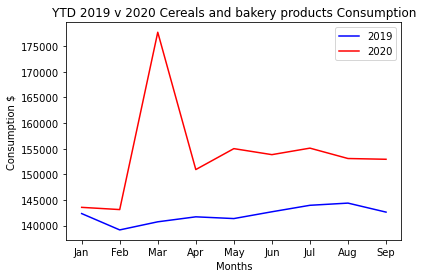

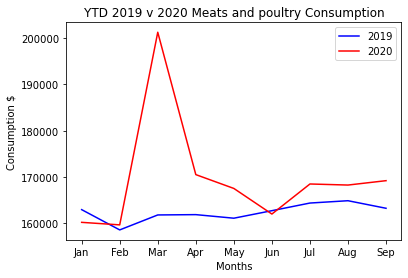

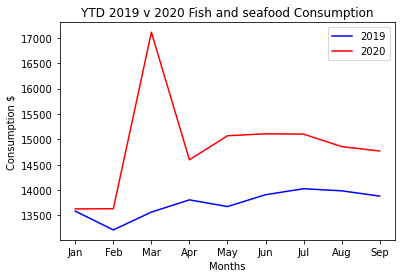

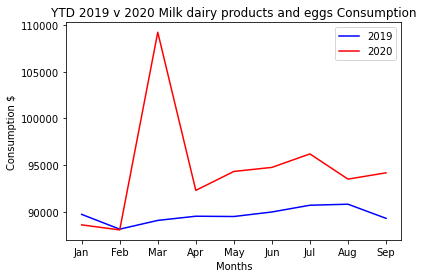

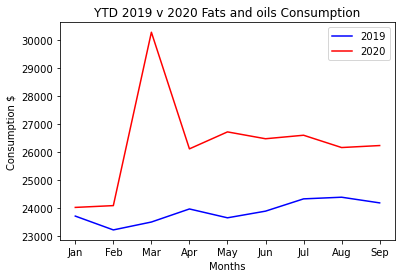

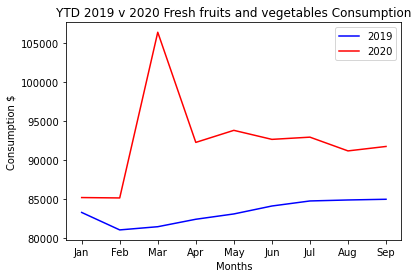

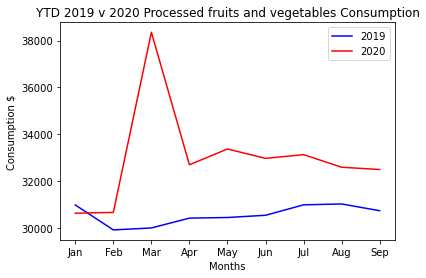

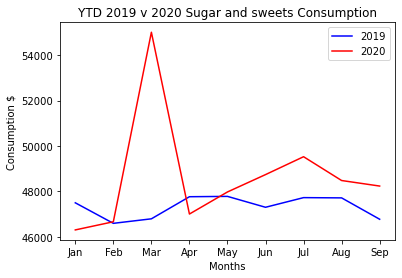

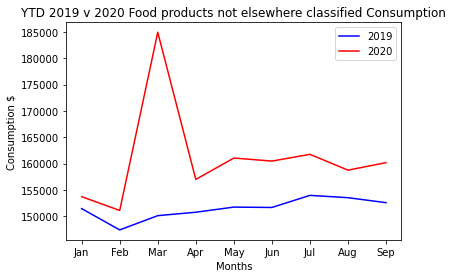

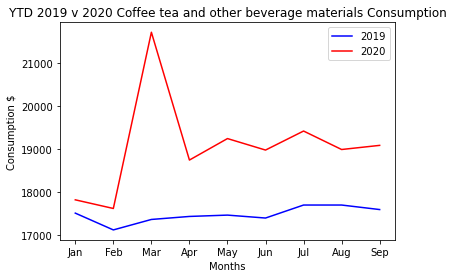

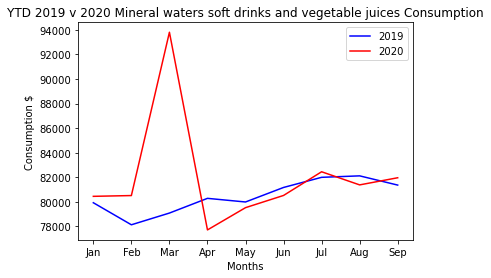

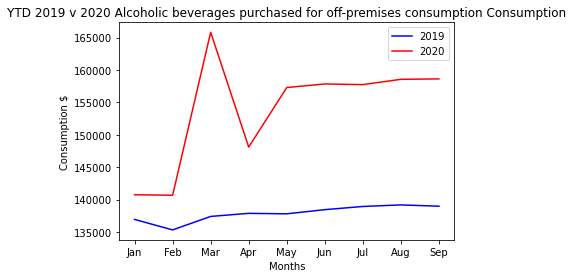

In [11]:
#loop using index to call catgory and create YTD comparisons for all categories
for index in grocery_df19.index:

    # define ytd category values
    ytd19 = grocery_df19.loc[index,:]
    ytd20 = grocery_df20.loc[index,:]

# plot data
    plt.plot(months,ytd19,color='blue',label='2019')
    plt.plot(months,ytd20, color='red',label='2020')
    plt.legend(['2019','2020'],loc='best')
    plt.title(f'YTD 2019 v 2020 {index} Consumption')
    plt.xlabel('Months')
    plt.ylabel('Consumption $')
    plt.savefig('Images/FYTD 19 v 20 Consumption by Category.png')
    plt.show()


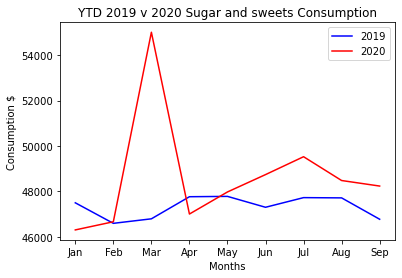

In [13]:
# set variable to call in category row using index
cat19 = grocery_df19.index[7]
cat20=grocery_df20.index[7]

# define ytd category values
ytd19 = grocery_df19.loc[cat19,:]
ytd20 = grocery_df20.loc[cat20,:]

# plot data
plt.plot(months,ytd19,color='blue',label='2019')
plt.plot(months,ytd20, color='red',label='2020')
plt.legend(['2019','2020'],loc='best')
plt.title(f'YTD 2019 v 2020 {cat19} Consumption')
plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.savefig('Images/2019 v 2020 Sweets Consumption.png')
plt.show()

In [14]:
# comapre Grocery consumption data as group YOY
grocery_df19['Total'] = grocery_df19.sum(axis=1)
grocery_df20['Total'] = grocery_df20.sum(axis=1)
grocery_df20

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Total
Consumption Category,,,,,,,,,,
Cereals and bakery products,143562,143129,177724,150935,155017,153845,155114,153090,152942,1385358
Meats and poultry,160228,159684,201253,170529,167545,162020,168507,168277,169222,1527265
Fish and seafood,13630,13633,17109,14597,15070,15109,15103,14857,14770,133878
Milk dairy products and eggs,88590,88048,109224,92285,94312,94746,96189,93489,94164,851047
Fats and oils,24033,24097,30268,26117,26721,26477,26602,26164,26235,236714
Fresh fruits and vegetables,85193,85144,106379,92262,93807,92650,92934,91172,91742,831283
Processed fruits and vegetables,30639,30674,38355,32704,33378,32978,33136,32600,32502,296966
Sugar and sweets,46298,46657,55010,46998,47971,48736,49524,48475,48231,437900
Food products not elsewhere classified,153724,151106,184953,157001,161062,160482,161763,158760,160188,1449039


In [19]:
grocery_df19 = grocery_df19['Total']
grocery_df19

KeyError: 'Total'